### On Testing Data

In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


import tensorflow as tf
from IPython.display import clear_output
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
import numpy as np
import random


np.random.seed(10) 
random.seed(10)

In [12]:
loaded_model = TFDistilBertForSequenceClassification.from_pretrained("tf_model")
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

clear_output(wait=False)

In [13]:
def inference(text, model, tokenizer):
    agent_text = text
    classes = {0:"upselling", 1:"not_upselling"}
    predict_input = tokenizer.encode(agent_text,
                                      truncation=True,
                                      padding=True,
                                      return_tensors="tf")

    tf_output = model.predict(predict_input,verbose=0)[0]
    tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]
    pred_ind = list(tf_prediction).index(tf_prediction.max())
    pred_ups = classes[pred_ind]
    conf = tf_prediction[list(tf_prediction).index(tf_prediction.max())]

    return pred_ups

In [19]:
import warnings
warnings.filterwarnings('ignore')

import glob
from tqdm.notebook import tqdm

testing_dir = "upselling_masked_datatesting_balanced/*/*.txt"

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
def load_model(weight):
    loaded_model = TFDistilBertForSequenceClassification.from_pretrained(weight)
    return loaded_model

upsell_classes = ["upselling", "not_upselling"]


y_true = []
y_pred = []


for file in glob.glob(testing_dir):
    ground=file.split('/')[-2]
    with open(file, "r") as f:
        text = f.read()

    predicted = inference(text, loaded_model, tokenizer)
        
    y_true.append(ground)
    y_pred.append(predicted)
    
    if ground=='not_upselling'and predicted=='upselling':
        print(file)
        

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
/home/ai/personal_workspace/muaaz/upselling/dataset/upselling_masked_data_refined/testing_balanced/not_upselling/1d49e871-0210-4a26-837a-f370c12062db.txt
/home/ai/personal_workspace/muaaz/upselling/dataset/upselling_masked_data_refined/testing_balanced/not_upselling/02da5ef7-e2b4-422c-b266-c49783d1ad96.txt
/home/ai/personal_workspace/muaaz/upselling/dataset/upselling_masked_data_refined/testing_balanced/not_upselling/1b7ddb4d-b827-4792-b4b4-8bbad8ece08a.txt
/home/ai/personal_workspace/muaaz/upselling/dataset/upselling_masked_data_refined/testing_balanced/not_upselling/0b70d4e3-8bb1-4aaa-849c-15bf4a27ece2.txt
/home/ai/personal_workspace/muaaz/upselling/dataset/upselling_masked_data

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

average_type = 'macro'
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average=average_type)
recall = recall_score(y_true, y_pred, average=average_type)
f1 = f1_score(y_true, y_pred, average=average_type)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9598540145985401
Precision: 0.9604673495518565
Recall: 0.9598540145985401
F1 Score: 0.9598406416969794


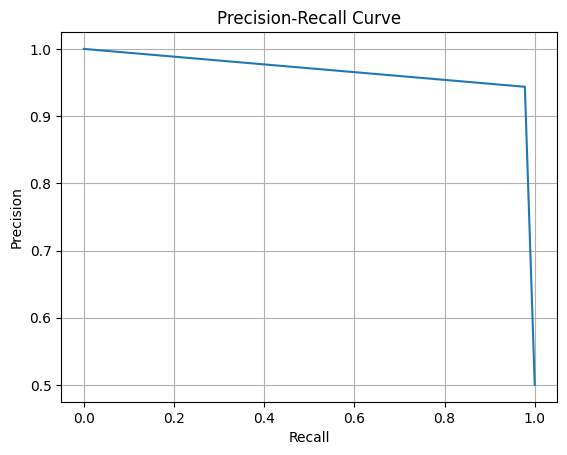

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

label_mapping = {'not_upselling': 0, 'upselling': 1}
y_true = [label_mapping.get(label, -1) for label in y_true]
y_pred = [label_mapping.get(label, -1) for label in y_pred]



# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


